In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
####################################################################################
### Serial Runs
####################################################################################

n_runs = 10

Matrix_size = 100
N_iterations = 10

CSV_filename = 'MMM_pt1.csv'


subprocess.run('g++ matrix_multiplication.cpp -o mmm_serial.exe')

for i in range(0,n_runs):
    result = subprocess.run(['.\mmm_serial.exe',str(Matrix_size),str(N_iterations),str(0),CSV_filename], capture_output=True, text=True, shell=True)
    output = result.stdout
    error = result.stderr

    if error:
        print(f"Error for n={i}: {error}")
        continue

    print(f"Output for n={i}: '{output}'\n")  # Print output for debugging

KeyboardInterrupt: 

In [ ]:
####################################################################################
### Open MP Runs - 1 Thread
####################################################################################
n_runs = 10

Matrix_size = 100
N_iterations = 10

CSV_filename = 'MMM_pt1.csv'

subprocess.run('g++ -fopenmp matrix_multiplication.cpp -o mmm_omp.exe')

for i in range(0,n_runs):
    result = subprocess.run(['.\mmm_omp.exe',str(Matrix_size),str(N_iterations),str(1),CSV_filename], capture_output=True, text=True, shell=True)
    output = result.stdout
    error = result.stderr

    if error:
        print(f"Error for n={i}: {error}")
        continue

    print(f"Output for n={i}: '{output}'\n")  # Print output for debugging


Output for n=0: ''

Output for n=1: ''

Output for n=2: ''

Output for n=3: ''

Output for n=4: ''

Output for n=5: ''

Output for n=6: ''

Output for n=7: ''

Output for n=8: ''

Output for n=9: ''



In [ ]:
####################################################################################
### Open MP Runs - Multiple Thread
####################################################################################
n_runs = 10
max_threads = 16 #Maximum number of threads available on this PC (change this)

Matrix_sizes = [20,100,1000]
N_Threads = np.arange(0,max_threads+1,1)
N_iterations = 10

CSV_filename = 'MMM_pt1.csv'

subprocess.run('g++ -fopenmp matrix_multiplication.cpp -o mmm_omp.exe')

for Matrix_size in Matrix_sizes:
    for threads in N_Threads:
        for i in range(0,n_runs):
            result = subprocess.run(['.\mmm_omp.exe',str(Matrix_size),str(N_iterations),str(threads),CSV_filename], capture_output=True, text=True, shell=True)
            output = result.stdout
            error = result.stderr

            if error:
                print(f"Error for n={i}: {error}")
                continue

            print(f"Output for n={i}: '{output}'\n")  # Print output for debugging

Output for n=0: ''

Output for n=1: ''

Output for n=2: ''

Output for n=3: ''

Output for n=4: ''

Output for n=5: ''

Output for n=6: ''

Output for n=7: ''

Output for n=8: ''

Output for n=9: ''

Output for n=0: ''

Output for n=1: ''

Output for n=2: ''

Output for n=3: ''

Output for n=4: ''

Output for n=5: ''

Output for n=6: ''

Output for n=7: ''

Output for n=8: ''

Output for n=9: ''

Output for n=0: ''

Output for n=1: ''

Output for n=2: ''

Output for n=3: ''

Output for n=4: ''

Output for n=5: ''

Output for n=6: ''

Output for n=7: ''

Output for n=8: ''

Output for n=9: ''

Output for n=0: ''

Output for n=1: ''

Output for n=2: ''

Output for n=3: ''

Output for n=4: ''

Output for n=5: ''

Output for n=6: ''

Output for n=7: ''

Output for n=8: ''

Output for n=9: ''

Output for n=0: ''

Output for n=1: ''

Output for n=2: ''

Output for n=3: ''

Output for n=4: ''

Output for n=5: ''

Output for n=6: ''

Output for n=7: ''

Output for n=8: ''

Output for n=9: ''



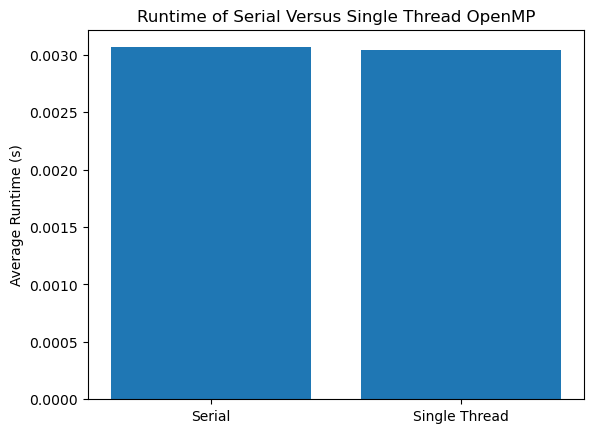

In [3]:
####Read data for P1
data_p1 = pd.read_csv('MMM_pt1.csv')

#get the average of the serial runtime:
serial_rt = np.mean(data_p1[data_p1[' Threads'] == 'Serial'][' Average Runtime']);

#get the avearage runtime with one thread and matrix size == 100
SingleThread_rt = np.mean(data_p1[(data_p1[' Threads'] == str(1)) & (data_p1['Matrix Size'] == 100) ][' Average Runtime']);

#Concat data and create the bar plot
bar_values = [serial_rt,SingleThread_rt]
bar_labels = ['Serial','Single Thread']


plt.bar(bar_labels,bar_values)
plt.ylabel("Average Runtime (s)")
plt.title("Runtime of Serial Versus Single Thread OpenMP")
plt.savefig('Serial_Vs_1Thread.jpg')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
unique threads =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
sp_100 =  [1.0, 1.9273263163947583, 2.7664979779506043, 3.532085879312047, 4.060142573964642, 4.5625656789316045, 4.9333579439267, 4.871232607358701, 4.0044630442689915, 4.175511857754397, 4.456904406497144, 4.731510495893701, 5.18054692772236, 5.1778962035357, 5.307411183032993, 5.345425075501565]


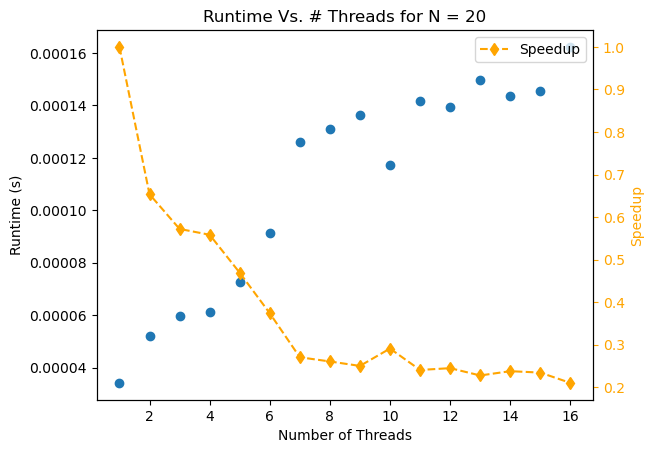

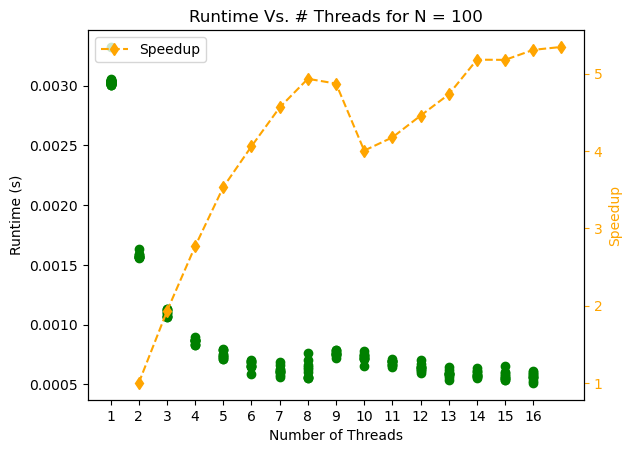

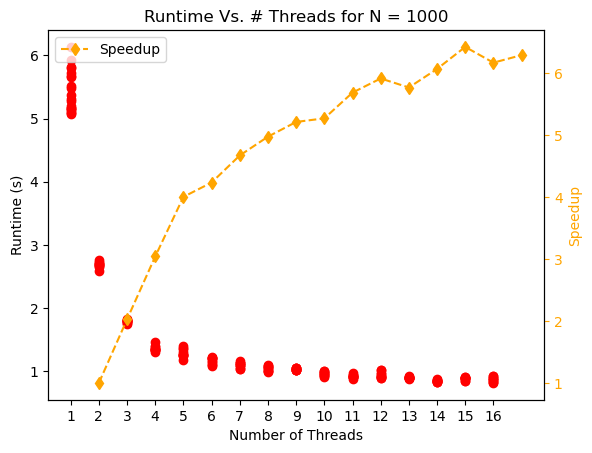

In [29]:
#Mask the data by the array size.
data_20 = data_p1[data_p1['Matrix Size'] == 20]
data_100 = data_p1[(data_p1['Matrix Size'] == 100) & (data_p1[' Threads'] != 'Serial')]
data_1000 = data_p1[data_p1['Matrix Size'] == 1000]

##Determine a single average runtime for each thread count 
unique_threads = sorted(np.unique(pd.to_numeric(data_20[' Threads'])))

print(unique_threads)

avgRT_20 = []
avgRT_100 = []
avgRT_1000 = []

sp_20 = []
sp_100 = []
sp_1000 = []

count = 0
for t in unique_threads:

    temp_20 = np.mean(data_20[data_20[' Threads'] == str(t)][' Average Runtime'])
    avgRT_20.append(temp_20)

    temp_100 = np.mean(data_100[data_100[' Threads'] == str(t)][' Average Runtime'])
    avgRT_100.append(temp_100)

    temp_1000 = np.mean(data_1000[data_1000[' Threads'] == str(t)][' Average Runtime'])
    avgRT_1000.append(temp_1000)

    # print("t, sp = ", t,avgRT_100[0]/temp_100)


    sp_20.append(avgRT_20[0]/temp_20)
    sp_100.append(avgRT_100[0]/temp_100)
    sp_1000.append(avgRT_1000[0]/temp_1000)
    count+=1

print("unique threads = ",unique_threads)
print("sp_100 = ",sp_100)

# print(avgRT_20)
# # plt.scatter(unique_threads,avgRT_20)

plt.figure()
plt.scatter(data_20[' Threads'],data_20[' Average Runtime'],label = 'N = 20')
plt.xlabel("Number of Threads")
plt.ylabel("Runtime (s)")
plt.title("Runtime Vs. # Threads for N = 20")
ax2 = plt.twinx()
ax2.plot(unique_threads,sp_20,'--d',label = 'Speedup',color = 'orange')
ax2.set_ylabel("Speedup")
# Set the color of the right y-axis ticks to match the line plot
ax2.yaxis.label.set_color('orange')  # Set label color
ax2.tick_params(axis='y', colors='orange')  # Set tick color
plt.legend()
# Set the x-axis limits explicitly to start at 1
ax2.set_xlim(1, max(unique_threads))
plt.savefig("TimeVsThreads_N20.jpg")

plt.figure()
plt.scatter(data_100[' Threads'],data_100[' Average Runtime'],label = 'N = 100',color = 'green')
plt.xlabel("Number of Threads")
plt.ylabel("Runtime (s)")
plt.title("Runtime Vs. # Threads for N = 100")
ax2 = plt.twinx()
ax2.plot(unique_threads,sp_100,'--d',label = 'Speedup',color = 'orange')
ax2.set_ylabel("Speedup")
# Set the color of the right y-axis ticks to match the line plot
ax2.yaxis.label.set_color('orange')  # Set label color
ax2.tick_params(axis='y', colors='orange')  # Set tick color
plt.legend()
plt.savefig("TimeVsThreads_N100.jpg")

plt.figure()
plt.scatter(data_1000[' Threads'],data_1000[' Average Runtime'],label = 'N = 1000',color = 'red')
plt.xlabel("Number of Threads")
plt.ylabel("Runtime (s)")
plt.title("Runtime Vs. # Threads for N = 1000")
ax2 = plt.twinx()
ax2.plot(unique_threads,sp_1000,'--d',label = 'Speedup',color = 'orange')
ax2.set_ylabel("Speedup")
# Set the color of the right y-axis ticks to match the line plot
ax2.yaxis.label.set_color('orange')  # Set label color
ax2.tick_params(axis='y', colors='orange')  # Set tick color
plt.legend()
plt.savefig("TimeVsThreads_N1000.jpg")